# Contour Plots

Using the data from [The construction of sparse models of Mars's crustal magnetic field [Moore and Bloxham 2017]](http://onlinelibrary.wiley.com.proxy-um.researchport.umd.edu/doi/10.1002/2016JE005238/full) lets contour the crustal magnetic field at Mars overtop of a Mars topographical map developed from images taken from the (Viking spacecraft)[https://astrogeology.usgs.gov/search/map/Mars/Viking/Color/Mars_Viking_ClrMosaic_global_925m]

In order to do this you will likely need to instal the package **cartopy** which provides mapping utilities in python and matplotlib as well as **pillow** which provides aditional image functionality to matplotlib.

```
conda install cartopy
conda install pillow
```

**Note** one of the assumptions made in this mapping is that the botom left corner of the Mars image is (lat,lon)=(-180,-90).




In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#this is to read in the matlab files
# which the data was saved in
import scipy.io as sio

#this is to grid data to an equally 
# spaced grid for plotting as opposed 
# to plotting polygons
from matplotlib.mlab import griddata 

#import the required functions
# from cartopy
from cartopy import config
import cartopy.crs as ccrs



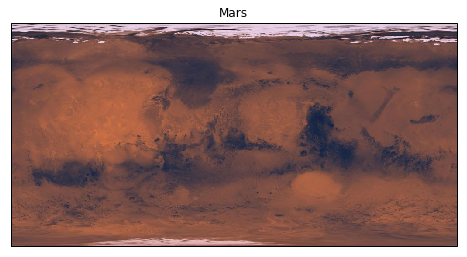

In [2]:
fig = plt.figure(figsize=(8, 12))

# get the path of the file. It can be found in the repo data directory.
fname = '../data/Mars_Viking_ClrMosaic_global_1024.jpg'
# define the lat/lon extent of the image
img_extent = (-180, 180, -90, 90)
# read in the image
img = plt.imread(fname)

# create a mapped projection plot
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title('Mars')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())


plt.show()

In [3]:
#load the data from Moore and Bloxham 2017

x = sio.loadmat('../data/jgre20703-sup-0002-supinfo.mat') #load grid data
y = sio.loadmat('../data/jgre20703-sup-0004-supinfo.mat') #load magnetic field data

br = y['Br_surf_glmnet'] #get radial magnetic field
br = np.array(br[:,0])
v  = x['V'] # get grid data

In [4]:
#create arrays of x,y,z cooridantes and 
# convert to spherical then to latitude
# and longitude

x_c = np.array(v[:,0])
y_c = np.array(v[:,1])
z_c = np.array(v[:,2])

r = np.sqrt(x_c**2+y_c**2+z_c**2)
theta = np.arctan2(x_c,y_c)
phi   = np.arccos(z_c/r)

lon   = theta*180./np.pi
colat = phi*180./np.pi
lat = 90-colat

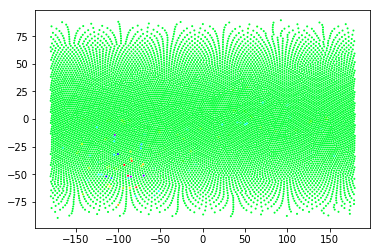

In [5]:
# plot longitude vs latitude with color mapped as
#  the radial magnetic feld

plt.scatter(lon,lat,s=1.0,c=br,cmap='hsv')

In [6]:
# create a longitude grid xi which is equally spaced
xi = np.linspace(-180,180,3600)
# create a latitude grid yi which is equally spaced
yi = np.linspace(-90,90,1800)
# grid the data to the equally spaced grid.
zi = griddata(lon, lat, br, xi, yi,interp='linear')

In [7]:
print(zi.shape)
print(xi.shape)
print(yi.shape)

print(zi.max(),zi.min(),zi.mean())
print(zi.dtype)


(1800L, 3600L)
(3600L,)
(1800L,)
(8927.8041392173618, -5206.6884305234198, -0.62878246661490322)
float64


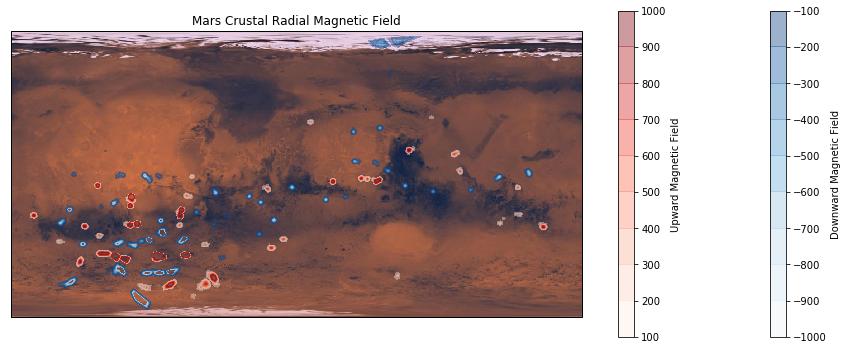

In [8]:
# read in the mars viking image
img = plt.imread(fname)


fig = plt.figure(figsize=(8*2, 12*2))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90])
plt.title('Mars Crustal Radial Magnetic Field')

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

# create two sets of leves for contouring
# one to show negative fields and the other positive
neg_levels = np.linspace(-1000,-100,10)
pos_levels = np.linspace(100,1000,10)

# countrou the gridded data with the postive and
#negative contours
CS_neg = ax.contourf(xi, yi, zi,transform = ccrs.PlateCarree(), alpha=0.4,cmap='Blues',levels=neg_levels)
CS_pos = ax.contourf(xi, yi, zi,transform = ccrs.PlateCarree(), alpha=0.4,cmap='Reds',levels=pos_levels)

# add color bar for the negative contours
cbar_neg = plt.colorbar(CS_neg, shrink=0.25)
cbar_neg.set_label("Downward Magnetic Field")
# add color bar for the positive conrours
cbar_pos = plt.colorbar(CS_pos, shrink=0.25)
cbar_pos.set_label("Upward Magnetic Field")

plt.show()
